### 1.Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### 2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
pd.set_option('display.max_columns', None)

### 3.First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4.Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
customer_df.columns=[e.lower().replace(' ', '_') for e in customer_df.columns]
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 5.Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] =pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [8]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 6.Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.



In [9]:
numerical_df = customer_df.select_dtypes(include = np.number)
numerical_df 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### 7.Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

We check first for the number of unique values in each column

In [10]:
def count_unique_values(column):
    unique_values = len(set(column))
    return unique_values

numerical_df.apply(count_unique_values)

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [11]:
def categorize_variables(df):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values > 538:  
            continuous_df[column] = df[column]
        else:
            discrete_df[column] = df[column]

    return continuous_df, discrete_df

continuous_df, discrete_df = categorize_variables(numerical_df)

In [12]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   int64  
 2   total_claim_amount       9134 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 214.2 KB


In [13]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   monthly_premium_auto           9134 non-null   int64
 1   months_since_last_claim        9134 non-null   int64
 2   months_since_policy_inception  9134 non-null   int64
 3   number_of_open_complaints      9134 non-null   int64
 4   number_of_policies             9134 non-null   int64
dtypes: int64(5)
memory usage: 356.9 KB


### 8.Plot a correlation matrix, comment what you see.

In [14]:
correlations_matrix = numerical_df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<Axes: >

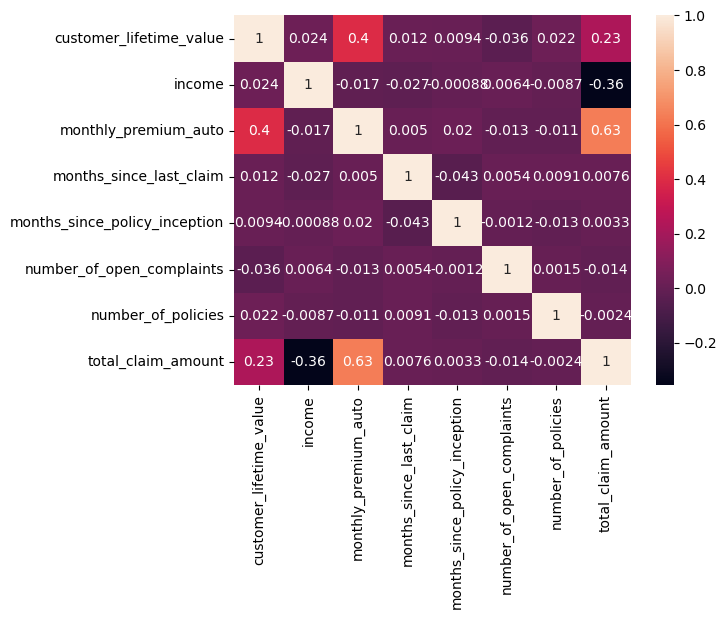

In [15]:
sns.heatmap(correlations_matrix, annot=True)


All the column are not correlated execpt may be 'monthly_premium_auto' and 'total_claim_amount'.

### 9.Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [16]:
def plot_discrete_variables(df):
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values < 539:  
            continuous_df[column] = df[column] 
            plt.figure(figsize=(8, 6))
            df[column].value_counts().sort_index().plot(kind='bar')
            plt.title(f'Discrete Variable: {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

def plot_continuous_variables(df):
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values > 538:  
            continuous_df[column] = df[column]  
            plt.figure(figsize=(8, 6))
            df[column].plot(kind='hist', bins=20)
            plt.title(f'Continuous Variable: {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

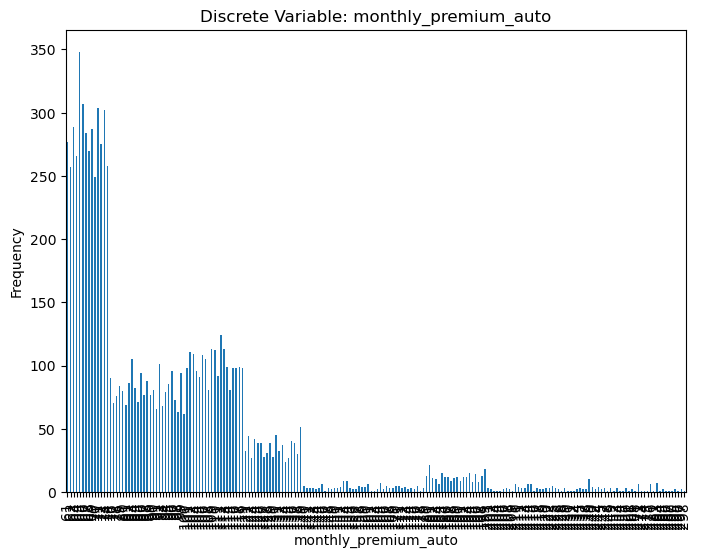

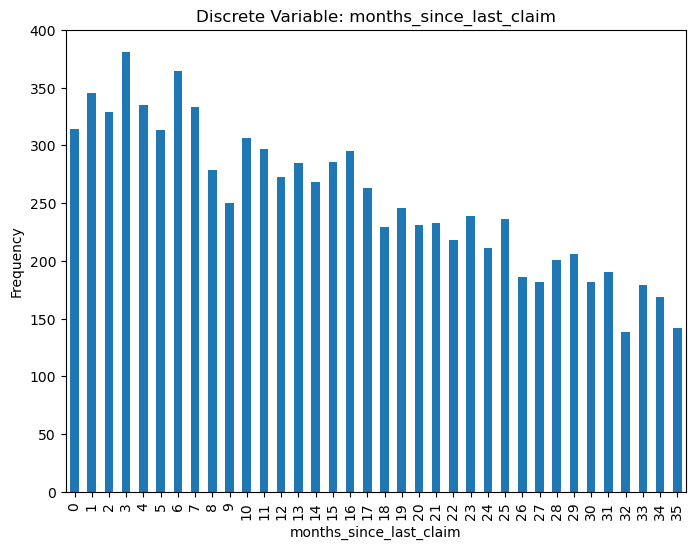

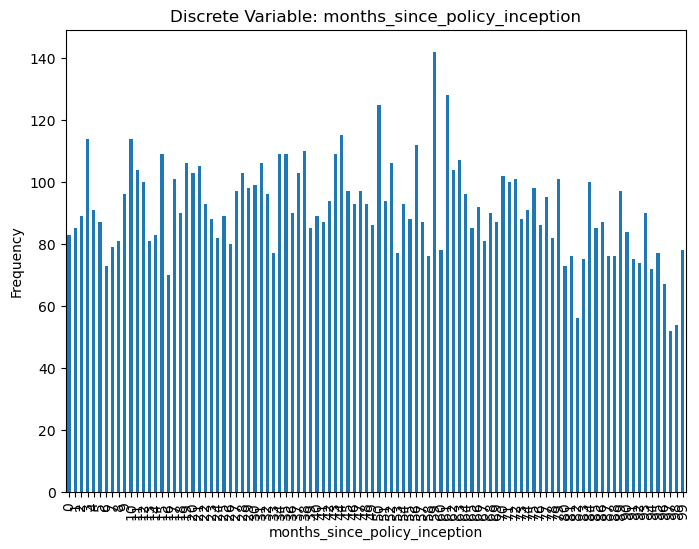

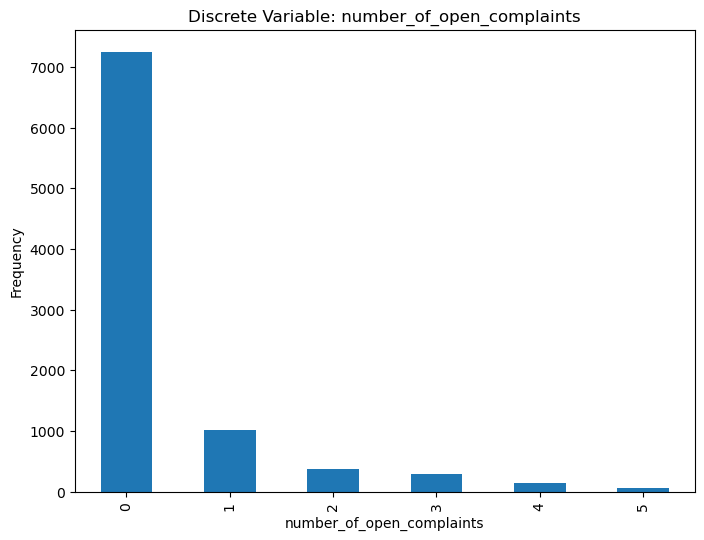

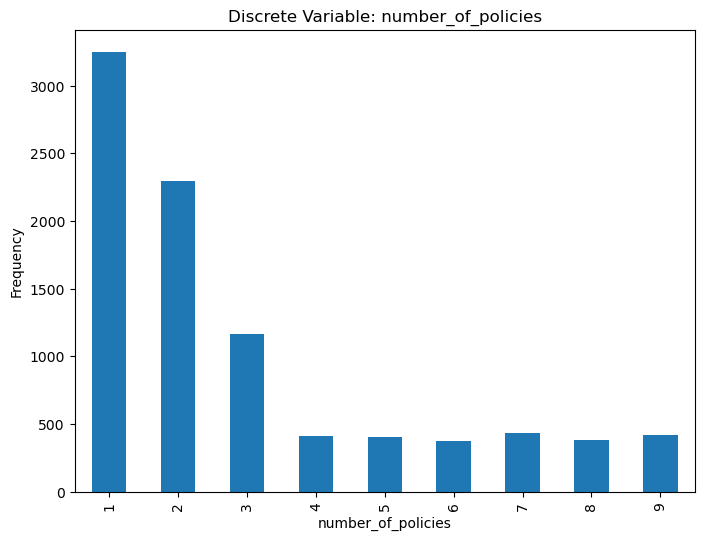

In [17]:
plot_discrete_variables(numerical_df)

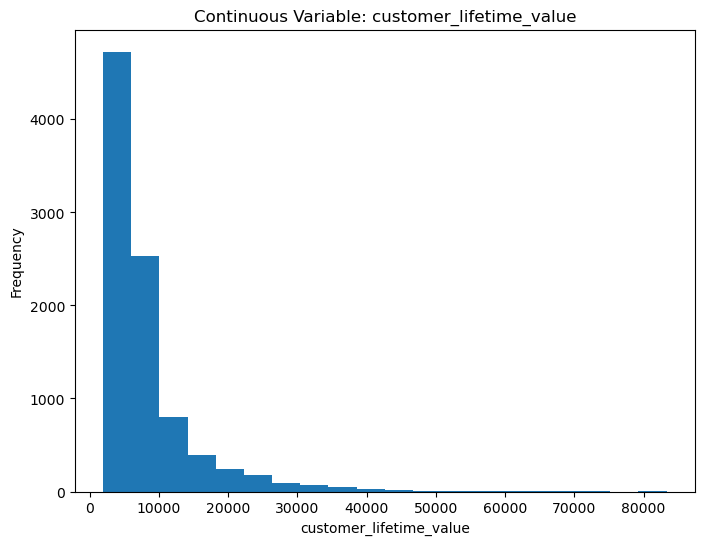

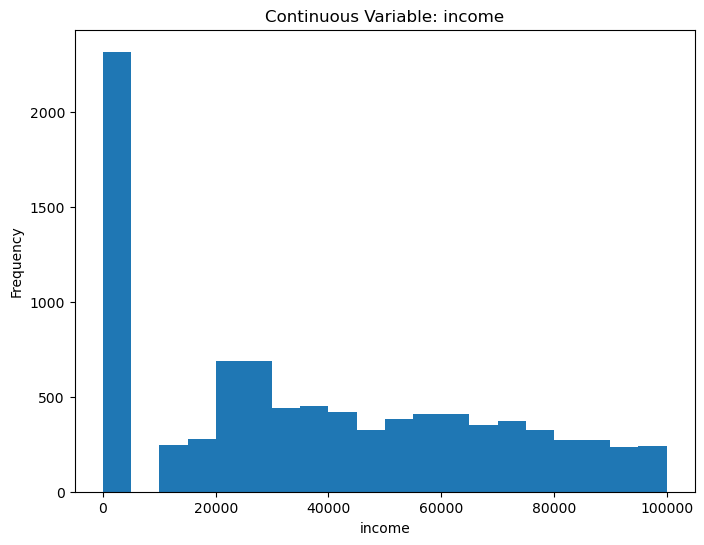

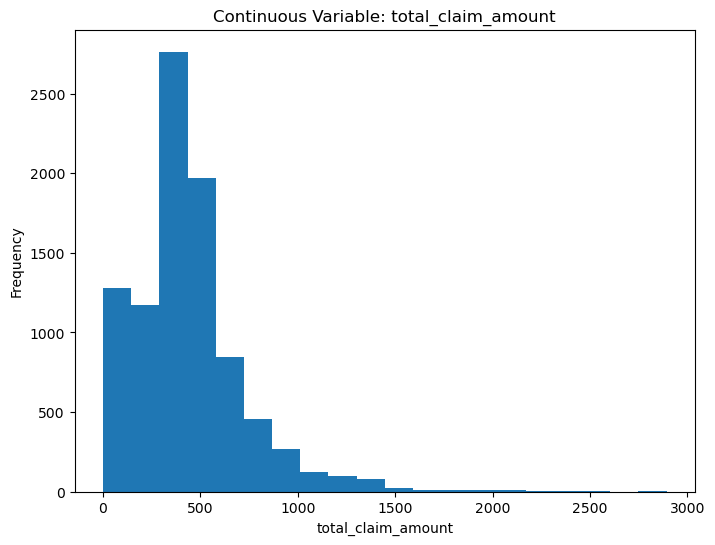

In [18]:
plot_continuous_variables(numerical_df)

### 10. Comment what you can see in the plots.

The columns 'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount' have big tails to the left and no one look like a normal distribustion.

### 11.Look for outliers in the continuous variables.

In [19]:
def plot_continuous_variables_boxplot(data):
    for column in data.columns:
        if len(set(data[column])) > 10:  # Assuming a variable with > 10 unique values is continuous
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=column, data=data)
            plt.title(f'Continuous Variable Boxplot: {column}')
            plt.xlabel(column)
            plt.ylabel('Value')
            plt.show()

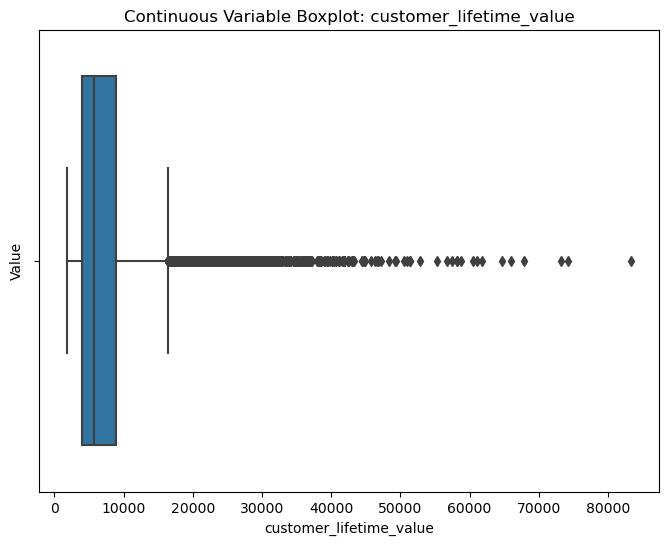

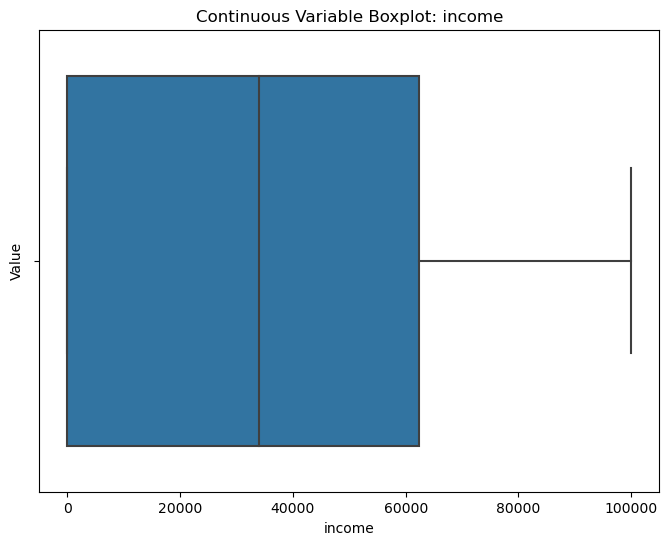

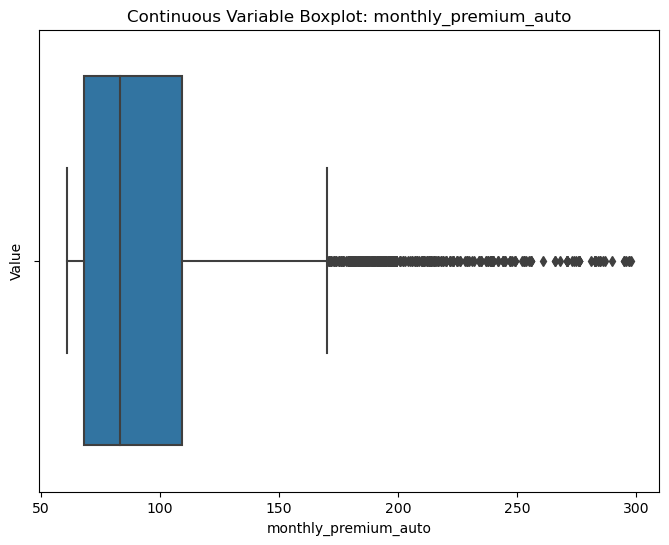

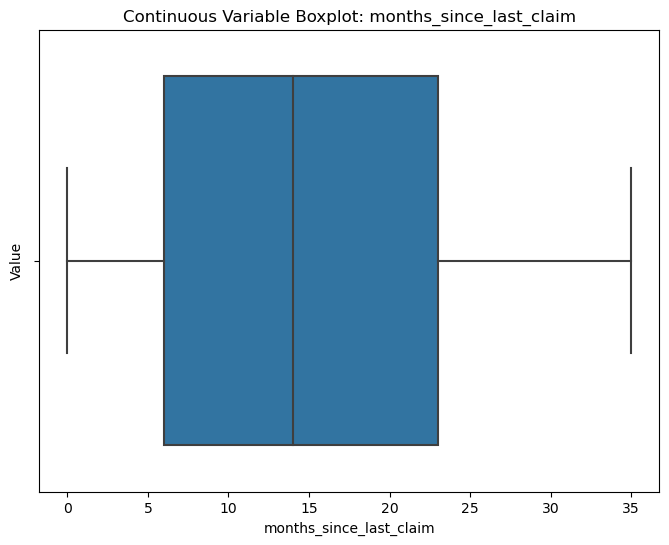

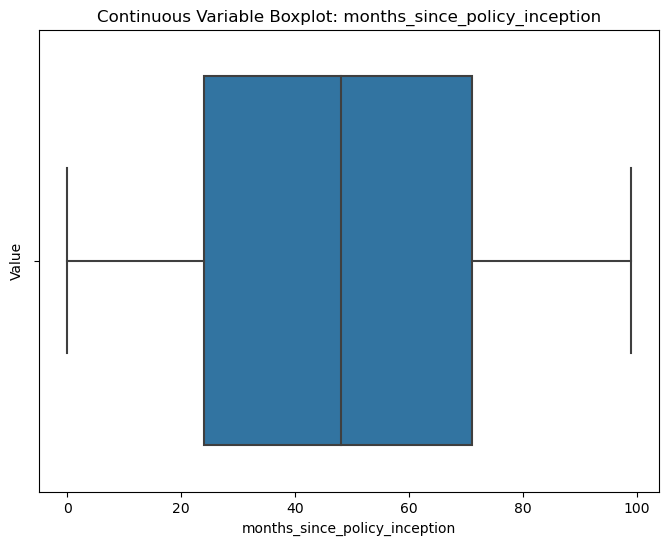

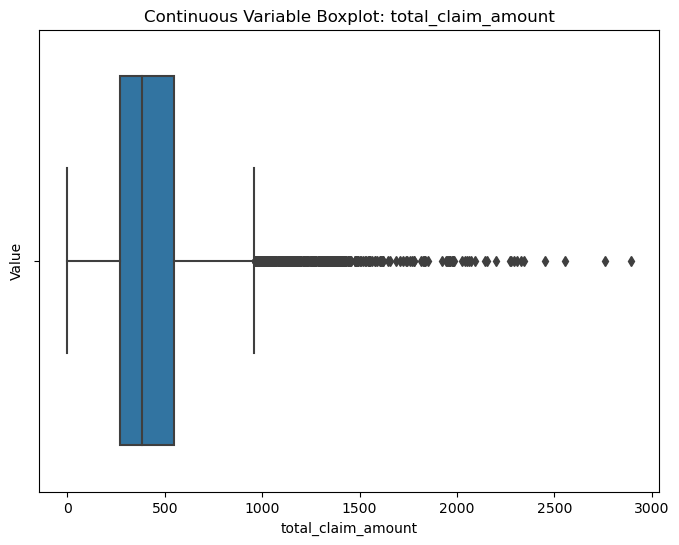

In [20]:
plot_continuous_variables_boxplot(numerical_df)

### 12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

We can see that tehre are outliers for 'customer_lifetime_value', 'monthly_premium_auto' and 'total_claim_amount'. We remove them from 'customer_lifetime_value' and 'monthly_premium_auto' with the iqr method but not from 'total_claim_amount' since it's our target.

In [21]:
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_removed = col[(col >= lower) & (col <= upper)]
    return outliers_removed 

<Axes: >

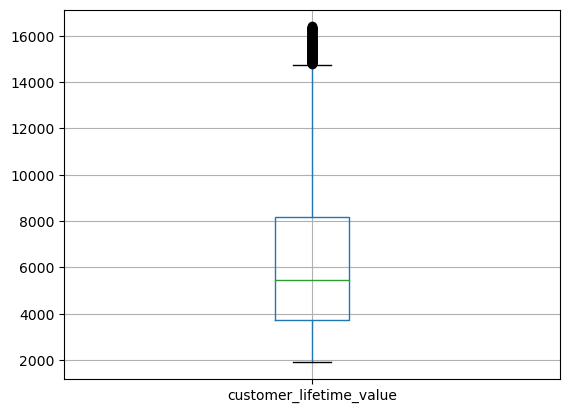

In [22]:
numerical_df['customer_lifetime_value'] = remove_outliers(numerical_df['customer_lifetime_value'])
numerical_df[['customer_lifetime_value']].boxplot()

<Axes: >

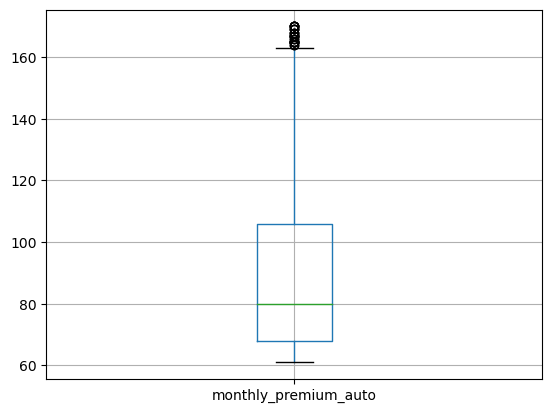

In [23]:
numerical_df['monthly_premium_auto'] = remove_outliers(numerical_df['monthly_premium_auto'])
numerical_df[['monthly_premium_auto']].boxplot()

### 13.Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.



In [24]:
numerical_df.isna().sum()

customer_lifetime_value          817
income                             0
monthly_premium_auto             430
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
total_claim_amount                 0
dtype: int64

We replace the NaN values by the mean

In [25]:
numerical_df['customer_lifetime_value'] = numerical_df['customer_lifetime_value'].fillna(numerical_df['customer_lifetime_value'].mean())

In [26]:
mean = numerical_df['monthly_premium_auto'].mean().round(decimals = 0)
numerical_df['monthly_premium_auto'] = numerical_df['monthly_premium_auto'].fillna(mean)

In [27]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

### 14.Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [28]:
numerical_df.to_csv('numerical_df', index=False)

# 2.Open the notebook created for Lab-cleaning-numerical-data.

### 2.2Find all of the categorical data. Save it in a categorical_df variable.

In [29]:
categorical_df = customer_df.select_dtypes(include=object)
display(categorical_df)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


### 2.3 Check for NaN values and decide what to do with them, do it now.

In [30]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

### 2.4 Check all unique values of columns.

In [31]:
categorical_df.nunique() 

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

### 2.5Check dtypes. Do they all make sense as categorical data?

In [32]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

The customer can not be treated as categorical since it's only unique values 

### 2.6 Does any column contain alpha and numeric data? Decide how to clean it and do it now.



The columns 'customer', 'policy' and 'renew_offer_type' contain alpha and numeric data.
We will drop the customer column since it's only IDs and give us no madditional information.
We also drop the column 'policy_type' since we can find the information in policy.

In [33]:
categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2.8 Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

The column 'policy_type' is just the same as 'policy' but without the level in it. We will keep only the level in the 'policy' column

In [34]:
def get_number_at_the_end(x):
    return x[len(x) - 1]

categorical_df['policy'] = categorical_df['policy'].apply(get_number_at_the_end)
categorical_df 

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,Offer3,Branch,Four-Door Car,Large


### 2.9 Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [35]:
for col in categorical_df.columns:
    display(categorical_df[col].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

3    4588
2    2881
1    1665
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

We will hot on encode 'state', 'employmentstatus', 'gender', 'marital_status', 'policy_type', 'sales_channel', 'vehicle_class,' since we can't not order the data that are in it.

We will ordinal encode 'coverage', 'education', 'vehicle_size'

We can group 'Single' and 'Divorced' as 'non_maried' in 'marital_status' and use npwhere.
We npwhere also 'response' and 'gender' ?

We can group 'Master' and 'Doctor' in column 'education' in the same category since there are less than the other categories in the same column, same for 'Luxury SUV', 'Sports Car' and 'Luxury Car' in the column 'vehicle_class'.

In [36]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['Master','Doctor']),'Master or Doctor',categorical_df['education'])

In [37]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master or Doctor        1083
Name: education, dtype: int64

In [38]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Luxury SUV','Luxury Car','Sports Car']),'Luxury',categorical_df['vehicle_class'])

In [39]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

In [40]:
categorical_df.to_csv('categorical_df', index=False)

# 3.Feature extraction

### 3.1 Open the categorical dataframe we created before.

In [41]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,Offer1,Agent,Four-Door Car,Medsize


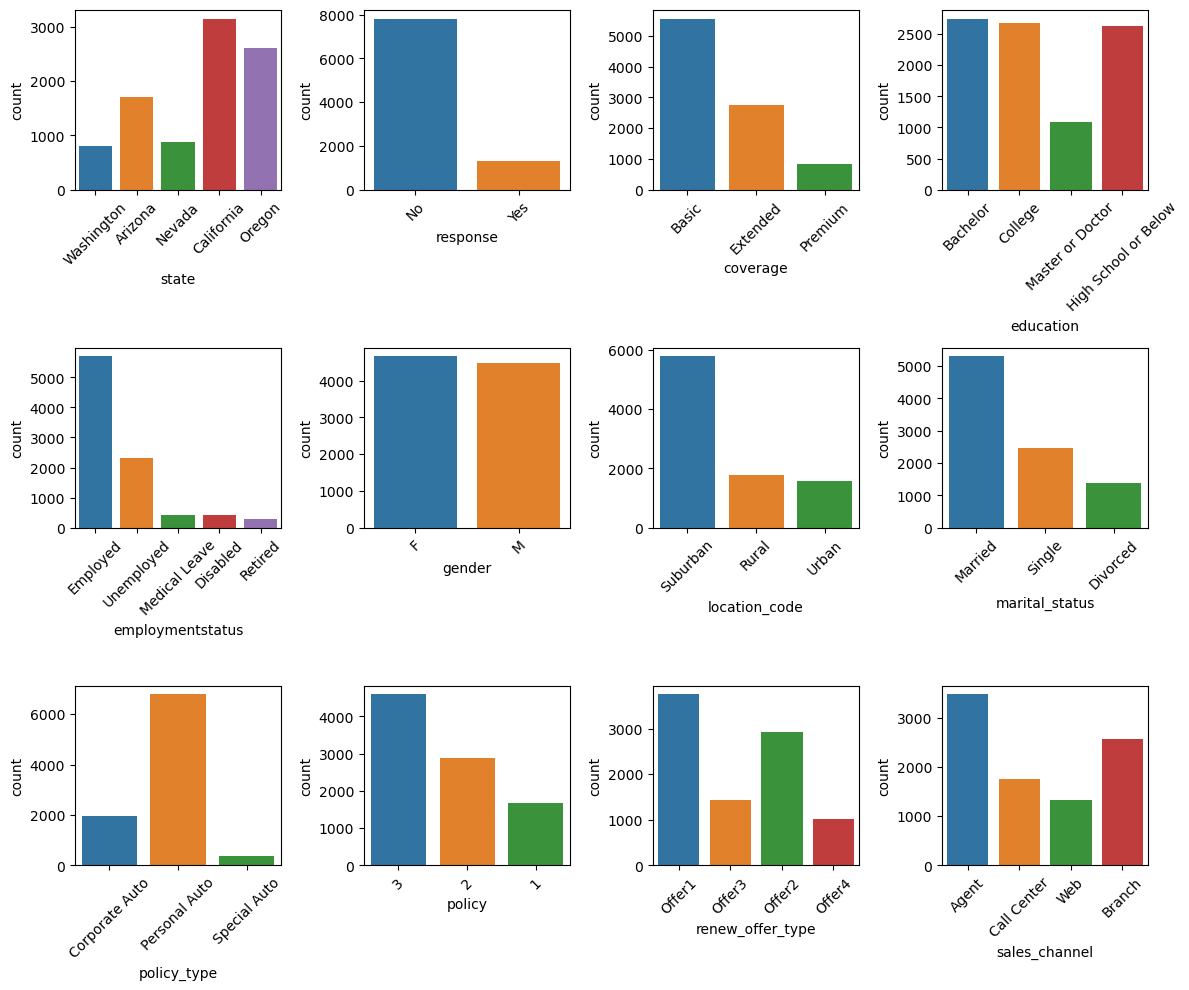

In [42]:
selected_categorical_columns = categorical_df.columns[:12]
plt.figure(figsize=(12, 10))
for idx, column in enumerate(selected_categorical_columns, start=1):
    plt.subplot(3, 4, idx)
    sns.countplot(x=column, data=categorical_df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### It seems that 'marital_status' and 'policy' have the same shape. Let's see if they can be related :

In [43]:
crosstab1 = pd.crosstab(categorical_df['marital_status'], categorical_df['policy'])
crosstab1

policy,1,2,3
marital_status,,,
Divorced,248,398,723
Married,982,1680,2636
Single,435,803,1229


In [44]:
import scipy.stats as st
st.chi2_contingency(crosstab1)[1]

0.17174419051104267

H0 : 'marital_status' and 'policy' are independant.

Since 'st.chi2_contingency(crosstab1)[1]' is >0,05 , we can not reject this hypothesis.
They might not be related 

#### Also 'renew_offer_type' and 'sales_chanel' look similar. Let's see if they can be related :

In [45]:
crosstab2 = pd.crosstab(categorical_df['renew_offer_type'], categorical_df['sales_channel'])
crosstab2

sales_channel,Agent,Branch,Call Center,Web
renew_offer_type,,,,
Offer1,1690,1099,588,375
Offer2,978,788,647,513
Offer3,518,394,291,229
Offer4,291,286,239,208


In [46]:
st.chi2_contingency(crosstab2)[1]

2.6956513667872733e-46

H0 : 'renew_offer_type' and 'sales_chanel' are independant.

Since 'st.chi2_contingency(crosstab2)[1]' is <0,05 , we can reject this hypothesis.
They might be related.

### 4.Plot time variable. Can you extract something from it?

In [47]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69.0,32,5,0,1,384.811147
1,6979.535903,0,94.0,13,42,0,8,1131.464935
2,12887.431650,48767,108.0,18,38,0,2,566.472247
3,7645.861827,0,106.0,18,65,0,7,529.881344
4,2813.692575,43836,73.0,12,44,0,1,138.130879


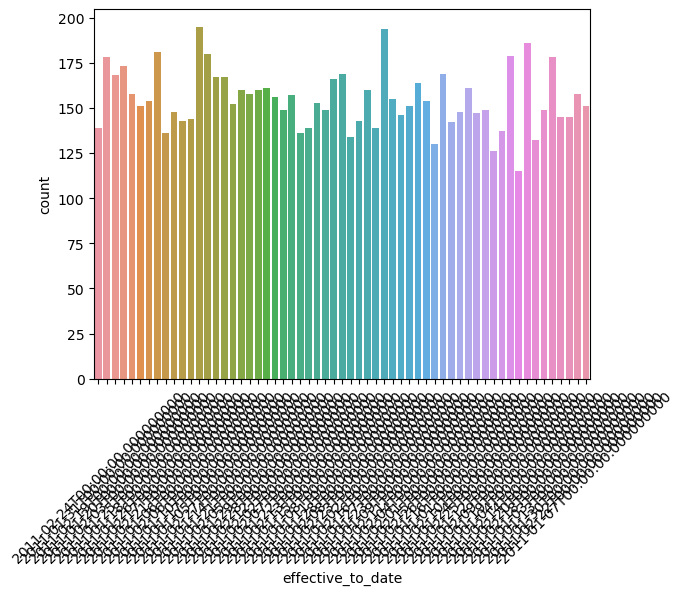

In [48]:
sns.countplot(data=customer_df, x='effective_to_date')
plt.xticks(rotation=45)
plt.show()

We can not extract something from that because the type is datetime format.

### 5.The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [49]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [50]:
customer_df['Year'] = customer_df['effective_to_date'].dt.year
customer_df['Month'] = customer_df['effective_to_date'].dt.month
customer_df['Day'] = customer_df['effective_to_date'].dt.day

In [51]:
customer_df 

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,Year,Month,Day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011,2,10
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011,2,12
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011,2,6
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011,2,3


In [52]:
numerical_df['Year'] = customer_df['Year'] 
numerical_df['Month'] = customer_df['Month'] 
numerical_df['Day'] = customer_df['Day']
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,Year,Month,Day
0,2763.519279,56274,69.0,32,5,0,1,384.811147,2011,2,24
1,6979.535903,0,94.0,13,42,0,8,1131.464935,2011,1,31
2,12887.431650,48767,108.0,18,38,0,2,566.472247,2011,2,19
3,7645.861827,0,106.0,18,65,0,7,529.881344,2011,1,20
4,2813.692575,43836,73.0,12,44,0,1,138.130879,2011,2,3
...,...,...,...,...,...,...,...,...,...,...,...
9129,6279.177892,71941,73.0,18,89,0,2,198.234764,2011,2,10
9130,3096.511217,21604,79.0,14,28,0,1,379.200000,2011,2,12
9131,8163.890428,0,85.0,9,37,3,2,790.784983,2011,2,6
9132,7524.442436,21941,96.0,34,3,0,3,691.200000,2011,2,3


In [53]:
numerical_df.to_csv('numerical_df', index=False)